In [1]:
import torch
ckpt_path = 'logs/2023-07-26_14-22-03-diffusion_matte-train_adapter_params_True/checkpoints/01-0.00418-0.02275.ckpt'
ckpt = torch.load(ckpt_path, map_location=torch.device('cpu'))
print(ckpt['state_dict'].keys())


/home/guohe/anaconda3/envs/icm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


odict_keys(['feature_extractor.alpha_cond', 'feature_extractor.alpha_cond_time_embed', 'feature_extractor.clip_project.positional_embedding', 'feature_extractor.clip_project.linear.weight', 'feature_extractor.clip_project.linear.bias', 'feature_extractor.time_embed_project.positional_embedding', 'feature_extractor.time_embed_project.linear.weight', 'feature_extractor.time_embed_project.linear.bias', 'diffusion_decoder.convstream.convs.0.conv.weight', 'diffusion_decoder.convstream.convs.0.bn.weight', 'diffusion_decoder.convstream.convs.0.bn.bias', 'diffusion_decoder.convstream.convs.0.bn.running_mean', 'diffusion_decoder.convstream.convs.0.bn.running_var', 'diffusion_decoder.convstream.convs.0.bn.num_batches_tracked', 'diffusion_decoder.convstream.convs.1.conv.weight', 'diffusion_decoder.convstream.convs.1.bn.weight', 'diffusion_decoder.convstream.convs.1.bn.bias', 'diffusion_decoder.convstream.convs.1.bn.running_mean', 'diffusion_decoder.convstream.convs.1.bn.running_var', 'diffusion_d

In [3]:
import torch
params = torch.load('ckpt/odise_label_coco_50e-b67d2efc.pth')
# gather the params with "backbone.feature_extractor." prefix
params = {k.replace("backbone.feature_extractor.", ""): v for k,
          v in params['model'].items() if "backbone.feature_extractor." in k}

In [ ]:
    def context_maskpooling(self, feature, guidance_on_reference_image, fixed_length=True):
        
        '''
        get context feature tokens by maskpooling
        feature: [C, H/d, W/d]
        mask: [1, H, W]  [0,1]
        return: [token_num, C]
        '''
        mask[mask < 1] = 0
        mask = -1 * mask
        kernel_size = mask.shape[1] // feature.shape[1]
        mask = F.max_pool2d(mask, kernel_size=kernel_size, stride=kernel_size, padding=0)
        
        
        index = mask == -1
        index = index.reshape(1,-1).squeeze()
        
        feature = feature.reshape(feature.shape[0],-1).permute(1,0)
        feature = feature[index]

        return feature

In [2]:
import json
import os
ratio=0.9
dataset_name=['PPM', 'AM2k', 'RWP636', 'P3M_val_np']

dataset = {}
for dataset_name_ in dataset_name:
    json_dir = os.path.join('datasets', dataset_name_+'.json')
    # read json file and append to dataset
    with open(json_dir) as f:
        new_data = json.load(f)
        # concat new_data to dataset
        dataset.update(new_data)
        

In [12]:
import random
item_list = list(dataset.items())
random.shuffle(item_list)


[('m_c8fff156', {'dataset_name': 'AM2k_train', 'class': 'animal', 'sub_class': 'rhinocero', 'HalfOrFull': 'full', 'TransparentOrOpaque': None}), ('p_1bafadcc', {'dataset_name': 'P3M_val_np', 'class': 'human', 'sub_class': None, 'HalfOrFull': 'full', 'TransparentOrOpaque': None}), ('03704_input', {'dataset_name': 'RWP636', 'class': 'human', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': None}), ('m_138636b8', {'dataset_name': 'AM2k_train', 'class': 'animal', 'sub_class': 'sheep', 'HalfOrFull': 'half', 'TransparentOrOpaque': None}), ('7563506064_09918edbde_o', {'dataset_name': 'PPM', 'class': 'human', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': None}), ('p_e7a43eac', {'dataset_name': 'P3M_val_np', 'class': 'human', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': None}), ('m_af27e1e4', {'dataset_name': 'AM2k_train', 'class': 'animal', 'sub_class': 'lion', 'HalfOrFull': 'full', 'TransparentOrOpaque': None}), ('p_87c6c465', {'dataset_name

In [15]:
a = 'dfd'
b = str(None)
c = a+b

In [2]:
a = {'a':1, 'b':2}
b = list(a.items())
(c1,c2) = b[0]
print(c1,c2)

a 1


In [3]:
import json
import os
json_dir = 'datasets/AIM.json'
# read json file as dict
with open(json_dir) as f:
    json_data = json.load(f)
print(json_data)

{'o_adfe7dcc': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_46818bea': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_ba1efe3b': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'full', 'TransparentOrOpaque': 'SO'}, 'o_6d345648': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_d8b96fe7': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_ecd1265b': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_67b293e1': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'TransparentOrOpaque': 'SO'}, 'o_494867da': {'dataset_name': 'AIM', 'class': 'animal', 'sub_class': None, 'HalfOrFull': 'half', 'Tran

In [4]:
class_ = []
for key, value in json_data.items():
    if value['class'] not in class_:
        class_.append(value['class'])
print(class_)

['animal', 'fruit', 'furniture', 'plant', 'portrait', 'transparent', 'toy']


In [ ]:
import shutil
my_class = [ 'fruit', 'furniture', 'plant',  'transparent', 'toy']
for key, value in json_data.items():
    if value['class'] in my_class:
        image_path = os.path.join('original', key+'.jpg')
        save_dir = os.path.join('class', value['class'])
        os.makedirs(save_dir, exist_ok=True)
        # copy image to save_dir
        shutil.copy(image_path, save_dir)

In [4]:
if 0:
    print('yes')

In [2]:
a =  4
print( list(a))

TypeError: 'int' object is not iterable

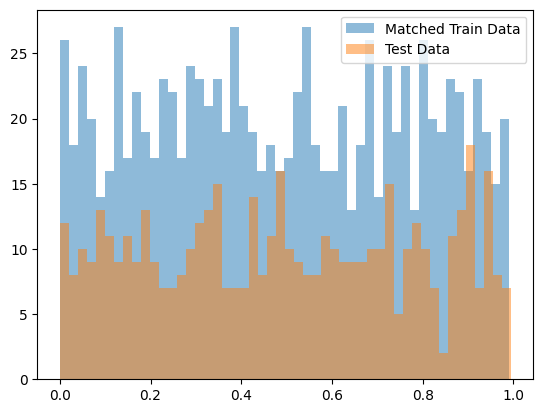

In [2]:
import numpy as np

def histogram_matching(train_data, test_data, bins=100):
    # 计算两个数据的直方图
    train_hist, train_bin_edges = np.histogram(train_data, bins=bins, density=True)
    test_hist, _ = np.histogram(test_data, bins=train_bin_edges, density=True)
    
    # 计算累计分布函数 (CDF)
    train_cdf = np.cumsum(train_hist) / sum(train_hist)
    test_cdf = np.cumsum(test_hist) / sum(test_hist)
    
    # 匹配直方图
    matched_train_data = np.interp(train_data, train_bin_edges[:-1], test_cdf)
    matched_train_data = np.interp(matched_train_data, test_cdf, train_bin_edges[:-1])
    
    return matched_train_data

# 模拟数据
train_data = np.random.rand(1000)
test_data = np.random.rand(500)

# 匹配训练数据的分布到测试数据
matched_train_data = histogram_matching(train_data, test_data)

# 你可以使用可视化工具，如matplotlib，来验证匹配后的分布
import matplotlib.pyplot as plt
plt.hist(matched_train_data, bins=50, alpha=0.5, label="Matched Train Data")
plt.hist(test_data, bins=50, alpha=0.5, label="Test Data")
plt.legend()
plt.show()
